### this notebook use the geospatial python environment

In [1]:
# !pip install nbformat 
# !pip install --upgrade nbformat
# !pip install jupyter
# !pip install nbformat==5.1.2

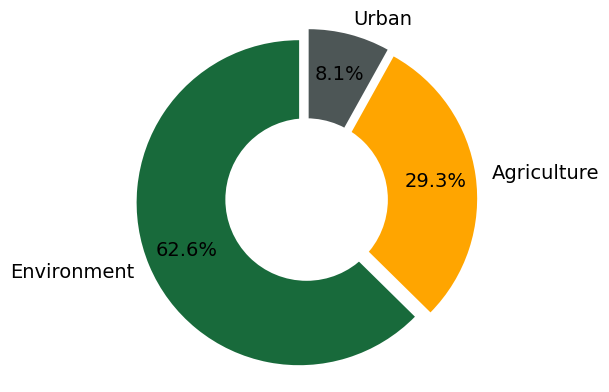

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Pie chart
labels = ['Environment', 'Agriculture', 'Urban']
sizes = [62, 29, 8]
#colors
colors = ['#186a3b','#FFA500','#4d5656']#,'#ffcc99'
#explsion
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
plt.pie(sizes, colors = colors, labels=labels, textprops={'fontsize': 14}, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
# plt.tight_layout()
# plt.show()
plt.savefig('wet_pie_chart.png', dpi=300)

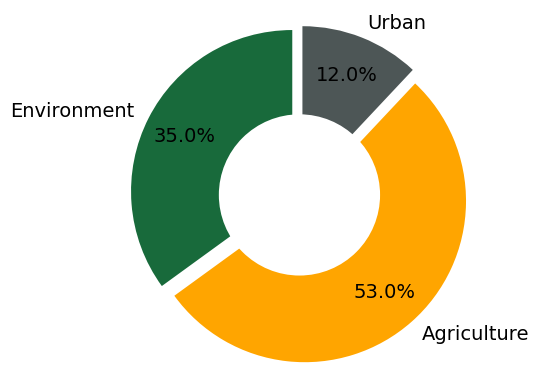

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Pie chart
labels = ['Environment', 'Agriculture', 'Urban']
sizes = [35, 53, 12]
#colors
colors = ['#186a3b','#FFA500','#4d5656']#,'#ffcc99'
#explsion
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
plt.pie(sizes, colors = colors, labels=labels, textprops={'fontsize': 14}, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
# plt.tight_layout()
# plt.show()
plt.savefig('dry_pie_chart.png', dpi=300)

In [4]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    orientation = "v",
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Riparian & Appropriative Rights", "State Water Project, Central Valley Project", "Independent Water Users", "Contractors", "Retail Water Users"]
      # Riparian & Appropriative Right: 0, SWP CVP: 1, Independent Water Users: 2, Contractors: 3, Retail: 4
    ),
    link = dict(
      source = [0, 0, 1, 3], 
      target = [1, 2, 3, 4],
      value =  [8, 2, 8, 8],

  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10,width=600, height=400)
fig.show(renderer="browser")

ModuleNotFoundError: No module named 'plotly'

In [5]:
import pandas as pd
df = pd.DataFrame({
    'animal': ['dog', 'cat', 'cat', 'dog', 'cat'],
    'sex': ['male', 'female', 'female', 'male', 'male'],
    'status': ['wild', 'domesticated', 'domesticated', 'wild', 'domesticated'],
    'count': [8, 10, 11, 14, 6]
})

fig = go.Figure(go.Parcats(
    dimensions=[
        {'label': 'animal', 'values': df['animal']},
        {'label': 'sex', 'values': df['sex']},
        {'label': 'status', 'values': df['status']},
    ],
    counts=df['count'],
))
fig.show(renderer="browser")

NameError: name 'go' is not defined

In [1]:
# !pip install rasterio

In [8]:
# ! pip install pandas
# ! pip install geopandas rasterio matplotlib numpy shapely fiona pyproj seaborn

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import matplotlib.dates as mdates
import os
# print(os.getcwd())
os.chdir("C:/Users/danli/OneDrive - University of North Carolina at Chapel Hill/github/CALFEWS")
print(os.getcwd())
import geopandas as gpd
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
import rasterio
from rasterio.plot import reshape_as_image
import matplotlib.pyplot as plt
import numpy as np


C:\Users\danli\OneDrive - University of North Carolina at Chapel Hill\github\CALFEWS


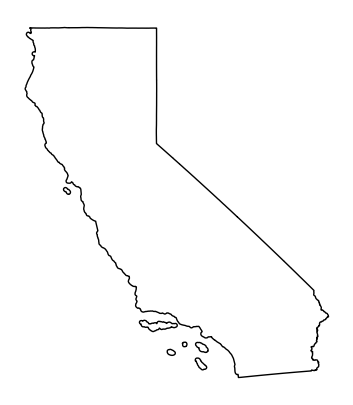

In [7]:
us_states = gpd.read_file("TransferGroupsCA/tl_2024_us_state/tl_2024_us_state.shp")
california = us_states[us_states['STUSPS'] == 'CA']

colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'lightgrey','pink','cyan']


california = california.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(5, 5))

california.boundary.plot(ax=ax, color='black', linewidth=1)
ax.set_axis_off()
# ax.set_title('California Water Agency Transfer Groups', pad=20)
plt.show()

California Shapefile CRS: EPSG:4269
Precipitation Raster CRS: OGC:CRS83
Precipitation Raster Bounds: BoundingBox(left=-125.0208333333335, bottom=24.062499999793495, right=-66.4791666661985, top=49.9375000000005)

Reprojecting California shapefile to match precipitation raster CRS...
Reprojection complete.

After Reprojection:
California Shapefile CRS: GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
Precipitation Raster CRS: OGC:CRS83

California Shapefile Bounds: [-124.848974   24.396308  -66.885444   49.384479]
Precipitation Raster Bounds: BoundingBox(left=-125.0208333333335, bottom=24.062499999793495, right=-66.4791666661985, top=49.9375000000005)

Clipped Precipitation Data Extent: [-124.8541666666655, -66.85416666620151, 24.3958333331295, 49.3958333333295]


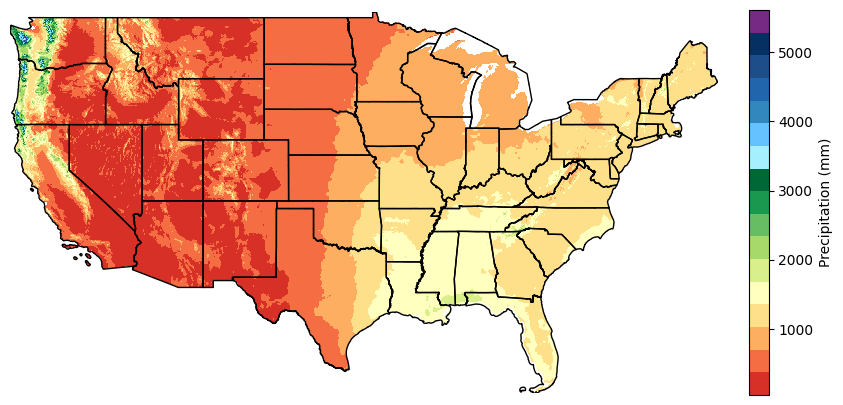

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import reshape_as_image
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask
import numpy as np
import matplotlib.patches as patches
import warnings
import matplotlib.colors as mcolors

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Path to your California shapefile
shapefile_path = "TransferGroupsCA/tl_2024_us_state/tl_2024_us_state.shp"
us_states = gpd.read_file(shapefile_path)
# california = us_states[us_states['STUSPS'] == 'CA']
conus_states = [
    'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 
    'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 
    'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 
    'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

# Filter the states DataFrame for only CONUS states
california = us_states[us_states['STUSPS'].isin(conus_states)]
# california = us_states[us_states['STUSPS'] == 'CA']

# Define a list of colors for transfer groups (if applicable)
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'lightgrey', 'pink', 'cyan']


print("California Shapefile CRS:", california.crs)

with rasterio.open("C:/Users/danli/Downloads/PRISM_ppt_30yr_normal_4kmM4_annual_bil/PRISM_ppt_30yr_normal_4kmM4_annual_bil.bil") as precip_ds:
    precip_crs = precip_ds.crs
    precip_bounds = precip_ds.bounds
    print("Precipitation Raster CRS:", precip_crs)
    print("Precipitation Raster Bounds:", precip_bounds)

# Reproject California to match precipitation raster CRS if they differ
if california.crs != precip_crs:
    print("\nReprojecting California shapefile to match precipitation raster CRS...")
    california = california.to_crs(precip_crs)
    print("Reprojection complete.")
else:
    print("\nCRS already match. No reprojection needed.")

print("\nAfter Reprojection:")
print("California Shapefile CRS:", california.crs)
print("Precipitation Raster CRS:", precip_crs)

california_bounds = california.total_bounds  # [minx, miny, maxx, maxy]
print("\nCalifornia Shapefile Bounds:", california_bounds)
print("Precipitation Raster Bounds:", precip_bounds)

overlap = not (
    california_bounds[2] < precip_bounds.left or
    california_bounds[0] > precip_bounds.right or
    california_bounds[3] < precip_bounds.bottom or
    california_bounds[1] > precip_bounds.top
)

# Extract the geometry of California in GeoJSON-like format
california_geom = [california.unary_union.__geo_interface__]

# Open the precipitation dataset for masking
with rasterio.open("C:/Users/danli/Downloads/PRISM_ppt_30yr_normal_4kmM4_annual_bil/PRISM_ppt_30yr_normal_4kmM4_annual_bil.bil") as precip_ds:
    # Perform the mask operation
    try:
        precip_clipped, precip_clipped_transform = mask(
            precip_ds, 
            california_geom, 
            crop=True,
            nodata=np.nan
        )
        precip_clipped = precip_clipped[0]  # Extract the first band
    except ValueError as ve:
        print("\nMasking failed with ValueError:", ve)
        print("Attempting alternative masking approach...")
        # Alternative masking approach: reproject geometry within mask
        if california.crs != precip_ds.crs:
            california_proj = california.to_crs(precip_ds.crs)
            california_geom_proj = [california_proj.unary_union.__geo_interface__]
        else:
            california_geom_proj = california_geom
        try:
            precip_clipped, precip_clipped_transform = mask(
                precip_ds, 
                california_geom_proj, 
                crop=True,
                nodata=np.nan
            )
            precip_clipped = precip_clipped[0]
            print("Alternative masking successful.")
        except Exception as e:
            print("Alternative masking failed with error:", e)
            exit()

# Define the extent of the clipped precipitation data
precip_clipped_extent = [
    precip_clipped_transform[2],  # left
    precip_clipped_transform[2] + precip_clipped_transform[0] * precip_clipped.shape[1],  # right
    precip_clipped_transform[5] + precip_clipped_transform[4] * precip_clipped.shape[0],  # bottom
    precip_clipped_transform[5]  # top
]

# Verify the extent visually
print("\nClipped Precipitation Data Extent:", precip_clipped_extent)

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust as needed
custom_cmap = mcolors.ListedColormap([
    '#D73027', '#F46D43', '#FDAE61', '#FEE08B',
    '#FFFFBF', '#D9EF8B', '#A6D96A', '#66BD63',
    '#1A9850', '#006837', '#A6EFFF', '#66C2FF',
    '#3288BD', '#2166AC', '#1D4E89', '#053061',
    '#762A83'
])
# Plot the clipped precipitation data
precip_plot = ax.imshow(
    precip_clipped, 
    cmap=custom_cmap, 
    extent=precip_clipped_extent, 
    # alpha=0.5,
    interpolation='nearest',
    # vmax=3000, vmin=1000
)

# Plot the California boundaries on top
california.boundary.plot(ax=ax, color='black', linewidth=1)
ax.set_axis_off()

cbar = fig.colorbar(precip_plot, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Precipitation (mm)')  # Replace 'mm' with actual units

# ax.set_title('California Topographic Map with Precipitation Overlay', fontsize=16, pad=20)

plt.savefig('Figure/california_precipitation_clipped_map.png', dpi=300, bbox_inches='tight')
plt.show()


EPSG:4326
EPSG:4269


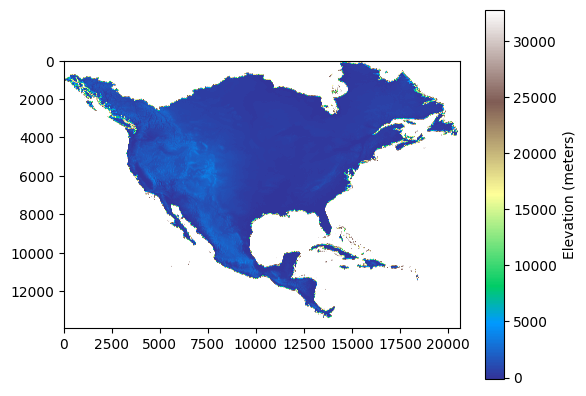

In [ ]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.crs import CRS
import rioxarray as rxr

# Path to your TIFF file
tif_path = r"C:/Users/danli/Downloads/hyd_na_dem_15s/hyd_na_dem_15s.tif"
dataset = rasterio.open(tif_path)
print(dataset.crs)

raster = rxr.open_rasterio(tif_path, masked=True).squeeze()
rds_4326 = raster.rio.reproject(CRS.from_string('EPSG:4269'))
print(rds_4326.rio.crs)
rds_4326.rio.to_raster("hyd_na_dem_15s_4269.tif")
#open it
raster_new = rasterio.open("hyd_na_dem_15s_4269.tif")

# dataset.crs
band1 = raster_new.read(1)
plt.imshow(band1, cmap='terrain')
plt.colorbar(label='Elevation (meters)')
plt.show()

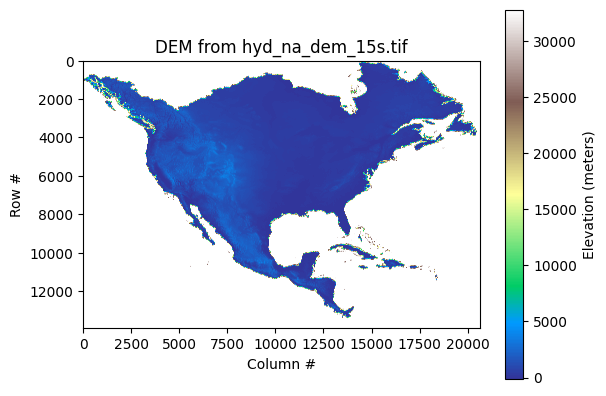

In [41]:
import rasterio
import matplotlib.pyplot as plt

# Path to your TIFF file
tif_path = r"C:/Users/danli/Downloads/hyd_na_dem_15s/hyd_na_dem_15s.tif"

# Open the TIFF file
with rasterio.open(tif_path) as dataset:
    # Read the first band
    band1 = dataset.read(1)
    
    # Print metadata
    dataset.meta
    
    # Plot the band
    plt.imshow(band1, cmap='terrain')
    plt.colorbar(label='Elevation (meters)')
    plt.title('DEM from hyd_na_dem_15s.tif')
    plt.xlabel('Column #')
    plt.ylabel('Row #')
    plt.show()


Shapefile CRS: EPSG:4269
DEM CRS: EPSG:4269
EPSG:4269


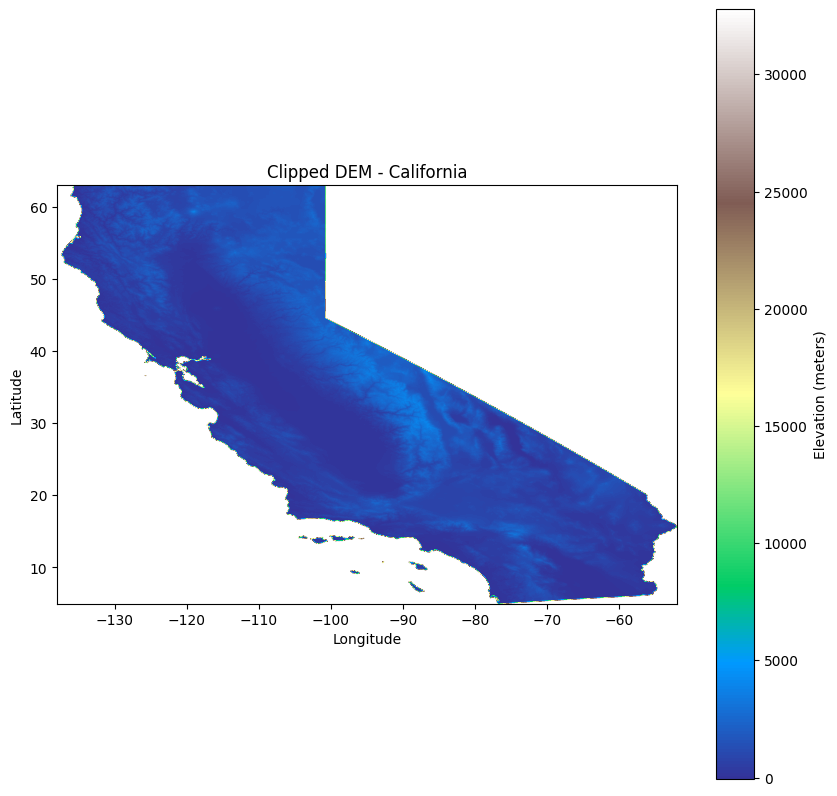

In [82]:
import rasterio
from rasterio.mask import mask
from rasterio.vrt import WarpedVRT
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
import rioxarray


# Paths to your files
# tif_path = r"C:/Users/danli/Downloads/hyd_na_dem_15s/hyd_na_dem_15s.tif"
tif_path = r"C:/Users/danli/Downloads/hyd_na_dem_15s/hyd_na_dem_15s_4326.tif"
shapefile_path = "TransferGroupsCA/tl_2024_us_state/tl_2024_us_state.shp"

us_states = gpd.read_file(shapefile_path)
california = us_states[us_states['STUSPS'] == 'CA']
california['geometry'] = california.simplify(0.001)

shapefile_crs = california.crs
print("Shapefile CRS:", shapefile_crs)
# Reproject the raster to match the shapefile's CRS using WarpedVRT
with rasterio.open(tif_path) as src:
    tif_crs = src.crs
    print("DEM CRS:", tif_crs)
    # src.rio.reproject("EPSG:4326")
    with WarpedVRT(src, src_crs=shapefile_crs) as vrt:
        clipped_image, clipped_transform = mask(
            vrt,
            california.geometry,
            crop=True,
            all_touched=True
        )
        print(tif_crs)
    clipped_dem = clipped_image[0]  # Use the first band
vmin = clipped_dem.min()
vmax = clipped_dem.max()

# Plot the clipped DEM
plt.figure(figsize=(10, 10))
plt.imshow(clipped_dem, cmap='terrain', extent=rasterio.plot.plotting_extent(src, clipped_transform), vmin=vmin, vmax=vmax)

plt.colorbar(label='Elevation (meters)')
plt.title('Clipped DEM - California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## make random grids with random color

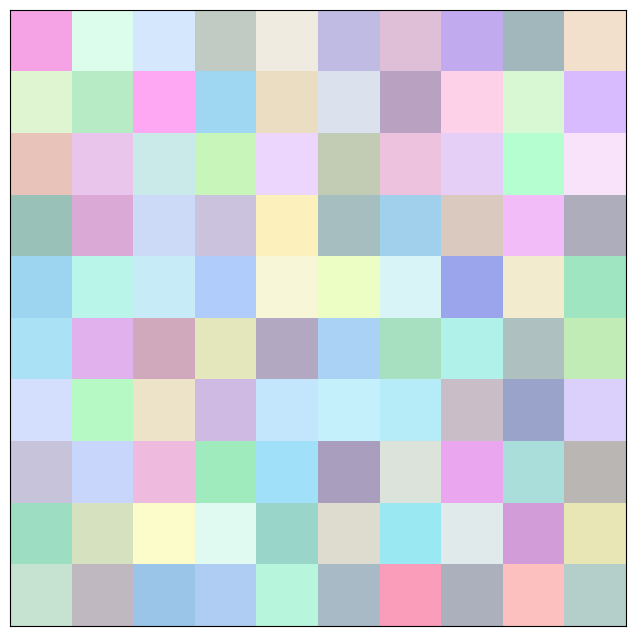

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def draw_random_colored_grid(grid_size=15, square_size=2):
    red = np.random.uniform(0.6, 1.0, (grid_size, grid_size))
    green = np.random.uniform(0.6, 1.0, (grid_size, grid_size))
    
    # Generate random values for blue channel between 0.7 and 1.0 to ensure blue dominance
    blue = np.random.uniform(0.7, 1.0, (grid_size, grid_size))
    
    # Stack the channels to create an (M, N, 3) array for RGB
    colors = np.stack((red, green, blue), axis=2)
    
    plt.figure(figsize=(square_size, square_size))
    plt.imshow(colors, extent=[0, grid_size, 0, grid_size])
    plt.xticks([])
    plt.yticks([])
    plt.grid(which='both', color='white', linewidth=1)
    # plt.show()

# Example usage
draw_random_colored_grid(grid_size=10, square_size=8)
# plt.savefig('Figure/random_colored_grid2.png', dpi=300, bbox_inches='tight')

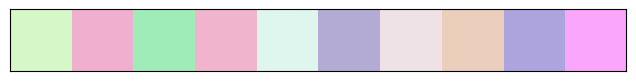

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def draw_random_colored_row(grid_size=15, square_size=2):
    # Set grid size for 1 row only
    num_rows = 1
    
    # Generate random RGB values
    red = np.random.uniform(0.6, 1.0, (num_rows, grid_size))
    green = np.random.uniform(0.6, 1.0, (num_rows, grid_size))
    blue = np.random.uniform(0.7, 1.0, (num_rows, grid_size))
    
    # Stack the channels to create an (1, grid_size, 3) array for RGB
    colors = np.stack((red, green, blue), axis=2)
    
    # Plot the single-row grid
    plt.figure(figsize=(square_size, square_size / grid_size))
    plt.imshow(colors, extent=[0, grid_size, 0, num_rows])
    plt.xticks([])
    plt.yticks([])
    plt.grid(which='both', color='white', linewidth=1)
    plt.show()

# Example usage
draw_random_colored_row(grid_size=10, square_size=8)


# illustration


C:\Users\danli\AppData\Local\Temp\ipykernel_21340\2575153454.py:32: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  california_geom = [california.unary_union.__geo_interface__]


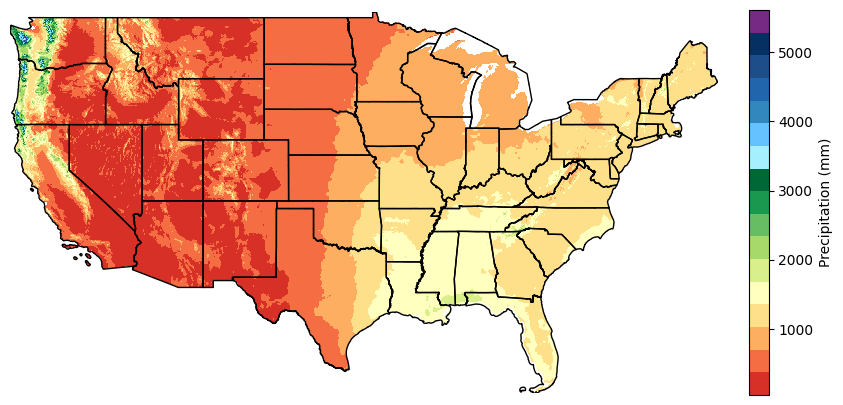

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.mask import mask
import numpy as np
import matplotlib.colors as mcolors

# Path to your California shapefile
shapefile_path = "TransferGroupsCA/tl_2024_us_state/tl_2024_us_state.shp"
us_states = gpd.read_file(shapefile_path)

# List of CONUS states
conus_states = [
    'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 
    'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 
    'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 
    'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

# Filter for CONUS states
california = us_states[us_states['STUSPS'].isin(conus_states)]

# Open the precipitation dataset and mask it with California geometry
precip_path = "C:/Users/danli/Downloads/PRISM_ppt_30yr_normal_4kmM4_annual_bil/PRISM_ppt_30yr_normal_4kmM4_annual_bil.bil"

with rasterio.open(precip_path) as precip_ds:
    precip_crs = precip_ds.crs
    # Reproject California shapefile to match precipitation raster CRS if needed
    if california.crs != precip_crs:
        california = california.to_crs(precip_crs)
    
    california_geom = [california.unary_union.__geo_interface__]
    precip_clipped, precip_clipped_transform = mask(
        precip_ds, 
        california_geom, 
        crop=True,
        nodata=np.nan
    )
    precip_clipped = precip_clipped[0]  # Extract the first band

# Define the extent of the clipped precipitation data
precip_clipped_extent = [
    precip_clipped_transform[2],  # left
    precip_clipped_transform[2] + precip_clipped_transform[0] * precip_clipped.shape[1],  # right
    precip_clipped_transform[5] + precip_clipped_transform[4] * precip_clipped.shape[0],  # bottom
    precip_clipped_transform[5]  # top
]

# Create a custom colormap with transparency for NaN values
custom_cmap = mcolors.ListedColormap([
    '#D73027', '#F46D43', '#FDAE61', '#FEE08B',
    '#FFFFBF', '#D9EF8B', '#A6D96A', '#66BD63',
    '#1A9850', '#006837', '#A6EFFF', '#66C2FF',
    '#3288BD', '#2166AC', '#1D4E89', '#053061',
    '#762A83'
])

# Set NaN values to be transparent
custom_cmap.set_bad(color=(0, 0, 0, 0))  # RGBA where A=0 is fully transparent

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust size as needed

# Plot the clipped precipitation data
precip_plot = ax.imshow(
    precip_clipped, 
    cmap=custom_cmap, 
    extent=precip_clipped_extent, 
    interpolation='nearest',
    vmin=np.nanmin(precip_clipped),  # Optional: set based on data
    vmax=np.nanmax(precip_clipped)   # Optional: set based on data
)

# Plot the California boundaries on top
california.boundary.plot(ax=ax, color='black', linewidth=1)

# Remove axis for a cleaner look
ax.set_axis_off()

# Add a colorbar
cbar = fig.colorbar(precip_plot, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Precipitation (mm)')  # Replace 'mm' with actual units if different

# Save the figure with a transparent background
plt.savefig('Figure/Illustration/california_precipitation_clipped_map.png', dpi=300, bbox_inches='tight', transparent=True)

# Display the plot
plt.show()


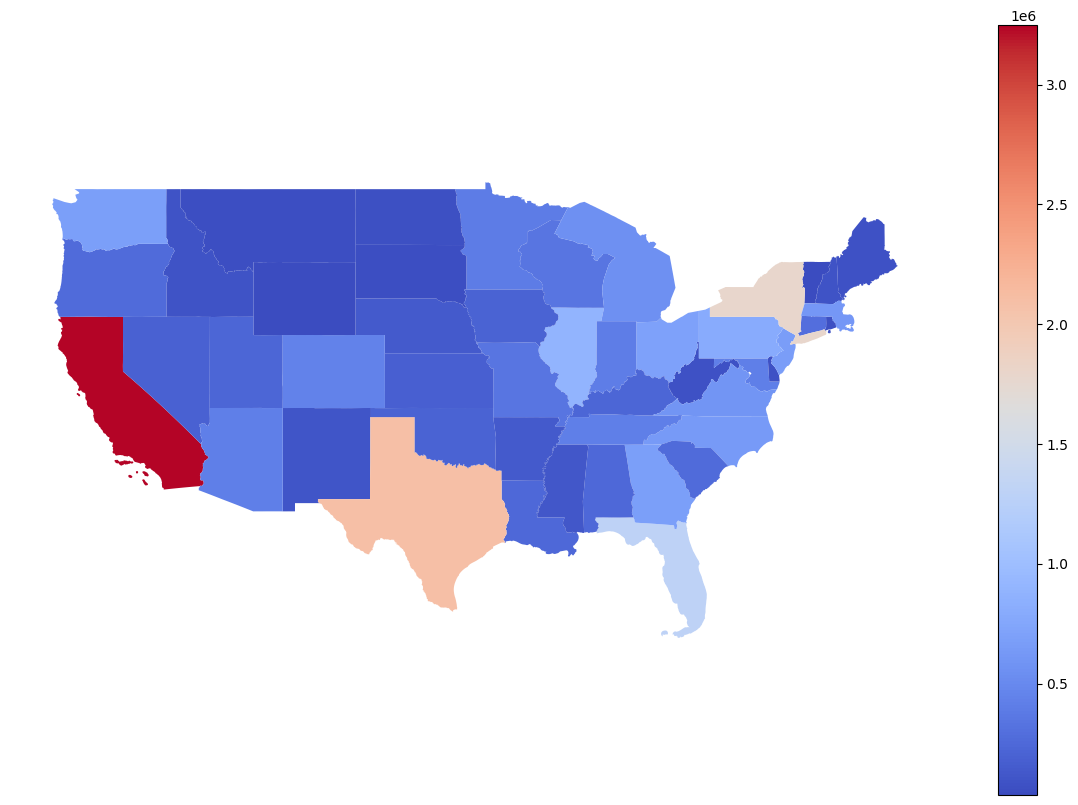

In [3]:
import pandas as pd
shapefile_path = "TransferGroupsCA/tl_2024_us_state/tl_2024_us_state.shp"
gdp_data_path = "C:/Users/danli/Downloads/Table.csv"

us_states = gpd.read_file(shapefile_path)
gdp_data = pd.read_csv(gdp_data_path, skiprows=3)

gdp_data['GeoFips'] = gdp_data['GeoFips'].astype(str).str.zfill(5)
gdp_data['STATEFP'] = gdp_data['GeoFips'].str[:2]

conus_states = [
    'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 
    'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 
    'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 
    'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]
CONUS = us_states[us_states['STUSPS'].isin(conus_states)]
merged_data = CONUS.merge(gdp_data, left_on='GEOID', right_on='STATEFP', how='left')
merged_data.plot(column='2023', cmap='coolwarm', legend=True, figsize=(15, 10))
plt.axis('off')
plt.savefig('Figure/Illustration/gdp_map.png', dpi=300, transparent=True)

<Axes: >

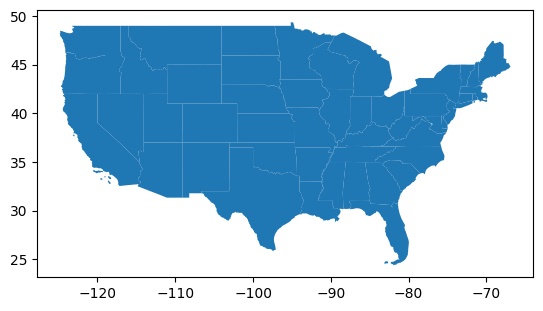

In [4]:
CONUS.plot()

<Axes: >

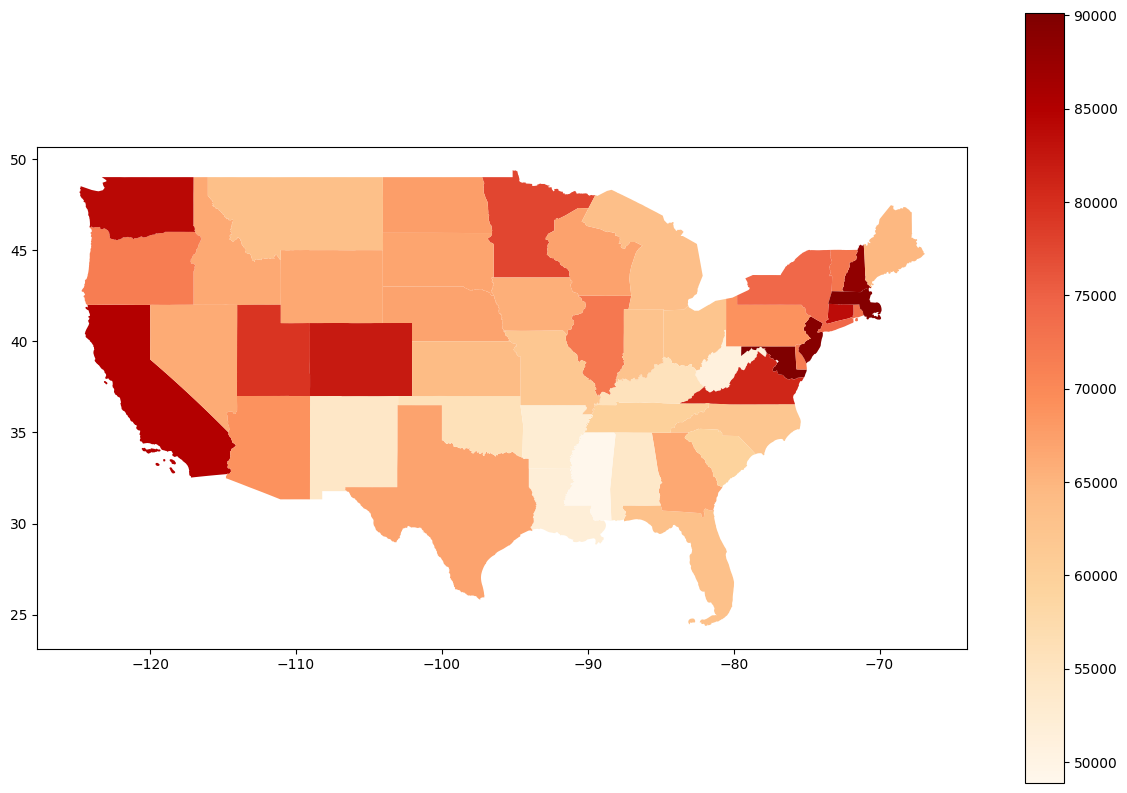

In [20]:
income_path = "C:/Users/danli/OneDrive - University of North Carolina at Chapel Hill/income_level.xlsx"
income_data = pd.read_excel(income_path)
income_data['GeoFips'] = income_data['FIPS'].astype(str).str.zfill(5)
income_data['STATEFP'] = income_data['GeoFips'].str[:2]
merged_data = CONUS.merge(income_data, left_on='GEOID', right_on='STATEFP', how='left')
merged_data.plot(column='Median_Household_Income', cmap='OrRd', legend=True, figsize=(15, 10))

In [ ]:
merged_data